## Project - EDA on Vehicle Insurance Customer Data
* A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

* The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

    1. Add the column names to both datasets:

        i. Column Name for customer details table:
           customer_id, 
           Gender,
           age, 
           driving licence present,
           region code, 
           previously insured, 
           vehicle age 
           and vehicle damage, in respective order. 

        ii. Column Name for customer_policy table:
           customer_id, 
           annual premium (in Rs), 
           sales channel code, 
           vintage and response. 

    2. Checking and Cleaning Data Quality:

        i. Null values
            * Generate a summary of count of all the null values column wise
            * Drop Null values for customer_id because central tendencies for id’s is not feasible.
            * Replace all null values for numeric columns by mean. 
            * Replace all null values for Categorical value by mode.
       ii. Outliers
            * Generate a summary of count of all the outliers column wise
            * Replace all outlier values for numeric columns by mean. (Hint1: for outlier treatment use IQR method as follows: For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier Hint2: For getting percentile value, explore pd.describe() function)
        iii. White spaces
            * Remove white spaces
        iv. case correction(lower or upper, any one) 
         v. Convert nominal data (categorical) into dummies for future modeling use if required
         vi. Drop Duplicates (duplicated rows)

    3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables. (Hint: use pd.merge() function)

    4. Company needs some important information from the master table to make decisions for future growth.They needs following information:
        i. Gender wise average annual premium
        ii. Age wise average annual premium
        iii. Is your data balanced between the genders? (Hint: Data is balanced if number of counts in each group is approximately same)
        iv. Vehicle age wise average annual premium.

     5. Is there any relation between Person Age and annual premium? Hint: use correlation function (Correlation describes the relationship between two variables). 
            * Correlation coefficient < -0.5      - Strong negative relationship
            * Correlation coefficient > 0.5       -  Strong positive relationship
            * 0.5 < Correlation coefficient < 0.5 - There is no relationship. 


In [1]:
# importing packages
import pandas as pd
import numpy as np

In [2]:
# Loading Data Files
customer_D = pd.read_csv('customer_details.csv')
customer_PD = pd.read_csv('customer_policy_details.csv')

### 1. Add column names to both tables 

In [3]:
# i. Column Name for customer details table:
customer_D.columns = ["customer_id","Gender","age","driving licence present","region code","previously insured","vehicle age","vehicle damage"]
print("\nCustomer Details Table:")
display(customer_D.head())

# ii. Column Name for customer policy details table:
customer_PD.columns = ["customer_id","annual premium (in Rs)","sales channel code","vintage","response"]
print("\nCustomer Policy Details Table:")
display(customer_PD.head())


Customer Details Table:


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No



Customer Policy Details Table:


,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [4]:
# Data Frame Information: shape and data type
print(customer_D.shape)
print(customer_D.info())

(381109, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              380723 non-null  float64
 1   Gender                   380741 non-null  object 
 2   age                      380741 non-null  float64
 3   driving licence present  380716 non-null  float64
 4   region code              380717 non-null  float64
 5   previously insured       380728 non-null  float64
 6   vehicle age              380728 non-null  object 
 7   vehicle damage           380702 non-null  object 
dtypes: float64(5), object(3)
memory usage: 23.3+ MB
None


In [5]:
print(customer_PD.shape)
print(customer_PD.info())

(381109, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             380722 non-null  float64
 1   annual premium (in Rs)  380763 non-null  float64
 2   sales channel code      380709 non-null  float64
 3   vintage                 380721 non-null  float64
 4   response                380748 non-null  float64
dtypes: float64(5)
memory usage: 14.5 MB
None


### 2. Checking and Cleaning Data Quality:

#### i). Null values

In [6]:
 # Generate a summary of count of all the null values column wise

print("Count of all null values column wise for 'Customer Details' table:\n")
print(customer_D.isnull().sum())

print("\nCount of all null values column wise for 'Customer Policy Details' table:\n")
print(customer_PD.isnull().sum())

Count of all null values column wise for 'Customer Details' table:

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

Count of all null values column wise for 'Customer Policy Details' table:

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64


In [7]:
# Drop Null values for customer_id because central tendencies for id’s is not feasible.
customer_D.dropna(subset=['customer_id'],axis = 0,inplace=True)
customer_D.reset_index(drop=True,inplace=True)
customer_PD.dropna(subset=['customer_id'],axis = 0,inplace=True)
customer_PD.reset_index(drop=True,inplace=True)

In [8]:
# Count of all null values after dropping null values of customer_id 
print("Count of Null values in after dropping null values for customer_id\n")
print("Count in Customer Details table:\n")
print(customer_D.isna().sum())
print("\n")
print("Count in Customer Policy Details Table:\n")
print(customer_PD.isna().sum())

Count of Null values in after dropping null values for customer_id

Count in Customer Details table:

customer_id                  0
Gender                     368
age                        366
driving licence present    392
region code                391
previously insured         381
vehicle age                381
vehicle damage             406
dtype: int64


Count in Customer Policy Details Table:

customer_id                 0
annual premium (in Rs)    344
sales channel code        400
vintage                   388
response                  361
dtype: int64


In [9]:
# Replace all null values for numeric columns by mean.
# Following columns are numeric values: Age, region code, annual premium (in Rs), sales channel code, vintage.
customer_D["age"].fillna(customer_D["age"].mean(),inplace=True)

customer_D["region code"].fillna(customer_D["region code"].mean(),inplace=True)

customer_PD["annual premium (in Rs)"].fillna(customer_PD["annual premium (in Rs)"].mean(),inplace=True)

customer_PD["sales channel code"].fillna(customer_PD["sales channel code"].mean(),inplace=True)

customer_PD["vintage"].fillna(customer_PD["vintage"].mean(),inplace=True)


#print('Null values in age column after dropping :',customer_D['age'].isna().sum())
#print('Null values in region code column after dropping :',customer_D['region code'].isna().sum())
#print("Null values in annual premium (in Rs) column after dropping :",customer_PD['annual premium (in Rs)'].isna().sum())
#print('Null values in sales channel code column after dropping :',customer_PD['sales channel code'].isna().sum())
#print('Null values in vintage column after dropping :',customer_PD['vintage'].isna().sum())


C:\Users\rajes\AppData\Local\Temp\ipykernel_17416\1326170548.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_D["age"].fillna(customer_D["age"].mean(),inplace=True)
C:\Users\rajes\AppData\Local\Temp\ipykernel_17416\1326170548.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [10]:
# Replace all null values for Categorical value by mode.
# Following columns are Categorical values
customer_D["Gender"].fillna(customer_D["Gender"].mode()[0],inplace=True)

customer_D["driving licence present"].fillna(customer_D["driving licence present"].mode()[0],inplace=True)

customer_D["previously insured"].fillna(customer_D["previously insured"].mode()[0],inplace=True)

customer_D["vehicle age"].fillna(customer_D["vehicle age"].mode()[0],inplace=True)

customer_D["vehicle damage"].fillna(customer_D["vehicle damage"].mode()[0],inplace=True)

customer_PD["response"].fillna(customer_PD["response"].mode()[0],inplace=True)

#print('Null values in Gender column after dropping :',customer_D['Gender'].isna().sum())
#print('Null values in driving licence present column after dropping:',customer_D['driving licence present'].isna().sum())
#print('Null values in previously insured column after dropping:',customer_D['previously insured'].isna().sum())
#print('Null values in vehicle age column after dropping:',customer_D['vehicle age'].isna().sum())
#print('Null values in vehicle damage column after dropping:',customer_D['vehicle damage'].isna().sum())
#print('Null values in response column after dropping:',customer_PD['response'].isna().sum())


C:\Users\rajes\AppData\Local\Temp\ipykernel_17416\3454629320.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_D["Gender"].fillna(customer_D["Gender"].mode()[0],inplace=True)
C:\Users\rajes\AppData\Local\Temp\ipykernel_17416\3454629320.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [11]:
print("Null values in 'Customer Details' table after dropping :\n")
print(customer_D.isnull().sum())
print("\n")
print("Null values in 'Customer Policy Details' Table after dropping :\n")
print(customer_PD.isnull().sum())

Null values in 'Customer Details' table after dropping :

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64


Null values in 'Customer Policy Details' Table after dropping :

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64


#### ii. Outliers

In [12]:
 # Generate a summary of count of all the outliers column wise

In [12]:
customer_D.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [13]:
customer_PD.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122410
std,110013.824148,17190.147550,54.177046,83.628096,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


#### Replace all outlier values for numeric columns by mean. 
    *  (Hint1: for outlier treatment use IQR method as follows: 
       For example: for a column X calculate Q1 = 25th percentile and 
    *  Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier,
       anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR 
       would be  an outlier 
    *  Hint2: For getting percentile value, explore pd.describe() function)

#### Note:"Numeric columns are"
    * 'Age', 'region code', 'annual premium (in Rs)'
      'sales channel code', and 'vintage' coulmns

In [15]:
# Replace all outlier values for numeric columns by mean.

def find_outlier(fout):   # To find number of outlier values
    Q1 = fout.quantile(0.25)
    Q3 = fout.quantile(0.75)
    IQR = Q3 - Q1
    fout = fout[((fout < (Q1-IQR*1.5)) | (fout > (Q3+IQR*1.5)))]
    return len(fout)

def replace_outlier(rout):  # Function to replace outlier values by means
    Q1 = rout.quantile(0.25)
    Q3 = rout.quantile(0.75)
    IQR = Q3 - Q1
    lower = rout[~(rout < (Q1-IQR*1.5))].min()
    upper = rout[~(rout > (Q3+IQR*1.5))].max()
    rout = np.where(rout>upper,rout.mean(),np.where(rout<lower,rout.mean(),rout))
    return rout

In [16]:
print("number of outliers in 'Age' column                   : ",find_outlier(customer_D["age"]))
print("number of outliers in 'region code' column           : ",find_outlier(customer_D["region code"]))
print("number of outliers in 'annual premium (in Rs)' column: ",find_outlier(customer_PD["annual premium (in Rs)"]))
print("number of outliers in 'sales channel code' column    : ",find_outlier(customer_PD["sales channel code"]))
print("number of outliers in 'vintage' column               : ",find_outlier(customer_PD["vintage"]))

number of outliers in 'Age' column                   :  0
number of outliers in 'region code' column           :  0
number of outliers in 'annual premium (in Rs)' column:  10332
number of outliers in 'sales channel code' column    :  0
number of outliers in 'vintage' column               :  0


#### Note:
    * 1. There are no outliers in 'Age', 'region code','sales channel 
         code', 'vintage' coulmns
    * 2. Outliers re present only in 'annual premium (in Rs)'

In [17]:
import matplotlib.pyplot as plt
# plot outliers of column 'annual premium (in Rs)' 
# before and after replacing outliers

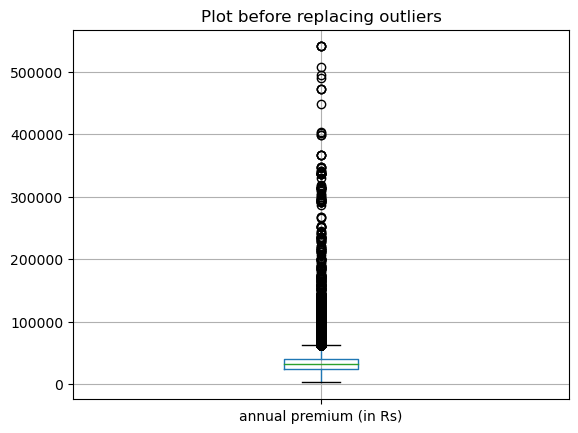

In [18]:
customer_PD.boxplot("annual premium (in Rs)")
plt.title("Plot before replacing outliers")
plt.show()

In [19]:
# replace_outlier column "annual premium (in Rs)"

customer_PD["annual premium (in Rs)"] = replace_outlier(customer_PD["annual premium (in Rs)"])

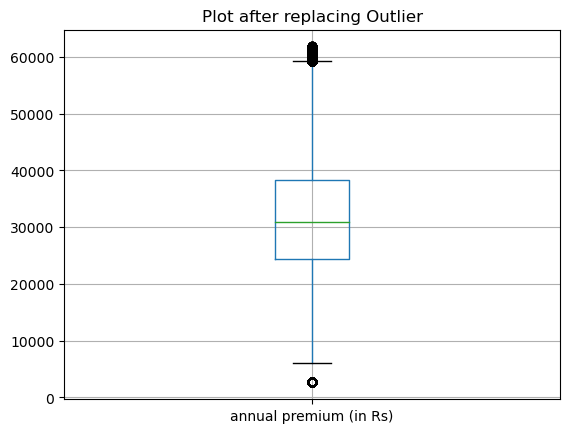

In [20]:
# After replacing outlier
customer_PD.boxplot("annual premium (in Rs)")
plt.title("Plot after replacing Outlier")
plt.show()

#### iii. White spaces

 * Remove white spaces

In [21]:
print("Before removing whitespaces")
customer_D.head()

Before removing whitespaces


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [22]:
customer_D = customer_D.apply(lambda x:x.str.strip() if x.dtype == 'object' else x)
print("After removing whitespaces")
customer_D.head()

After removing whitespaces


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


#### iv. case correction(lower or upper, any one) 

In [23]:
print("Before case correction")
customer_D.head()

Before case correction


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [24]:
# Converting all ino lower case
customer_D = customer_D.apply(lambda x:x.str.lower() if x.dtype == 'object' else x)
print("After Converting all into lower case")
customer_D.head()

After Converting all into lower case


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no


In [25]:
# Converting all into upper case
customer_D = customer_D.apply(lambda x:x.str.upper() if x.dtype == 'object' else x)
print("After Converting all into upper case")
customer_D.head()

After Converting all into upper case


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO


#### v. Convert nominal data (categorical) into dummies for future modeling use if required

In [26]:
dummy_gender = pd.get_dummies(customer_D["Gender"])
dummy_driving_licence_present = pd.get_dummies(customer_D["driving licence present"])
dummy_previously_insured = pd.get_dummies(customer_D["previously insured"])
dummy_vehicle_age = pd.get_dummies(customer_D["vehicle age"])
dummy_vehicle_damage = pd.get_dummies(customer_D["vehicle damage"])

In [27]:
dummy_gender.head()

,FEMALE,MALE
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [28]:
dummy_vehicle_age.head()

,1-2 YEAR,< 1 YEAR,> 2 YEARS
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [29]:
dummy_vehicle_damage.head() 

,NO,YES
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


#### vi. Drop Duplicates (duplicated rows)

In [30]:
# Check for duplicate values
print(customer_D.duplicated().sum()) # from customer details table
print(customer_PD.duplicated().sum()) # from customer policy details table

0
0


In [31]:
# Drop dupicates: 
# 1). from customer details table
customer_D.drop_duplicates(inplace=True) 
# 2) from customer policy details table
customer_PD.drop_duplicates(inplace=True) 

### 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables. (Hint: use pd.merge() function)

In [32]:
merged_customer_Data = pd.merge(customer_D,customer_PD, on='customer_id')
merged_customer_Data.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES,40454.0,26.0,217.0,1.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO,33536.0,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES,38294.0,26.0,27.0,1.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO,28619.0,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO,27496.0,152.0,39.0,0.0


### 4. Company needs some important information from the master table to make decisions for future growth.
##### They needs following information: 
            
              i. Gender wise average annual premium 
             ii. Age wise average annual premium 
            iii. Is your data balanced between the genders? (Hint: Data is balanced if number of counts in each group is approximately same) 
             iv. Vehicle age wise average annual premium.
              v. Is there any relation between Person Age and annual premium? Hint: use correlation function (Correlation describes the relationship between two variables).
            Correlation coefficient < -0.5 - Strong negative relationship
            Correlation coefficient > 0.5 - Strong positive relationship
            0.5 < Correlation coefficient < 0.5 - There is no relationship.

Gender
FEMALE    29273.474247
MALE      29323.099677
Name: annual premium (in Rs), dtype: float64

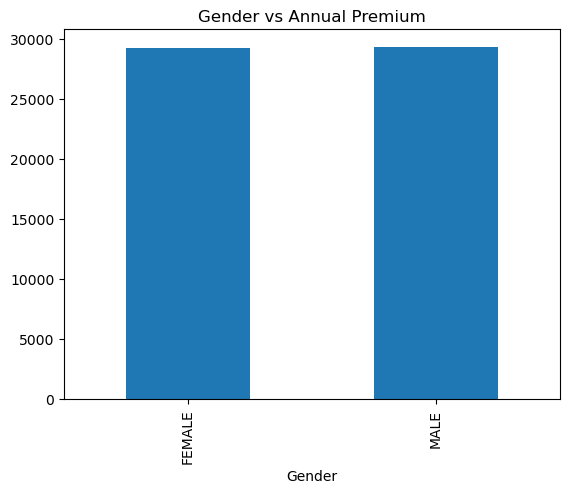

In [33]:
# i. Gender wise average annual premium
premium_gender = merged_customer_Data.groupby('Gender')['annual premium (in Rs)'].mean()
display(premium_gender)
premium_gender.plot.bar(title="Gender vs Annual Premium")
plt.show()

age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (in Rs), Length: 67, dtype: float64

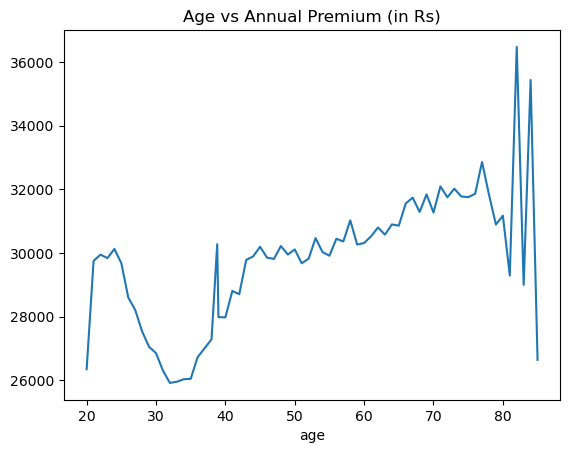

In [34]:
# ii. Age wise average annual premium 
premium_age = merged_customer_Data.groupby('age')['annual premium (in Rs)'].mean()
display(premium_age)
premium_age.plot(title="Age vs Annual Premium (in Rs)")
plt.show()

,customer_id,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,
FEMALE,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485
MALE,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851


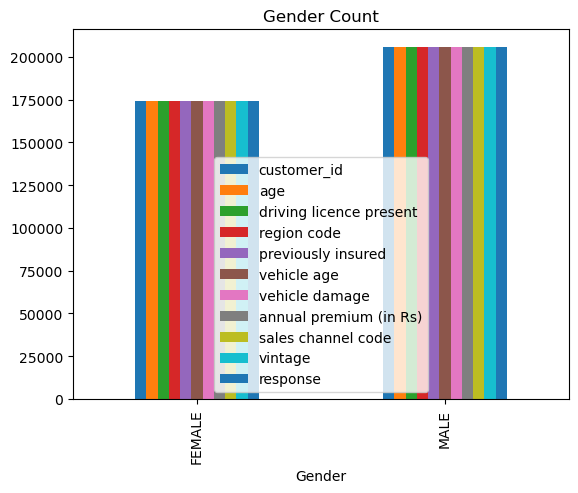

In [35]:
#  iii. Is your data balanced between the genders? 
gender_equal =merged_customer_Data.groupby('Gender').count()
display(gender_equal)
gender_equal.plot.bar(title="Gender Count")
plt.show()

In [36]:
if merged_customer_Data.equals(gender_equal) == True:
    print("Yes, the data is balanced between the genders")
else:
    print("No, the data is not balanced between the genders")

No, the data is not balanced between the genders


vehicle age
1-2 YEAR     29102.009839
< 1 YEAR     29188.150594
> 2 YEARS    32943.540830
Name: annual premium (in Rs), dtype: float64

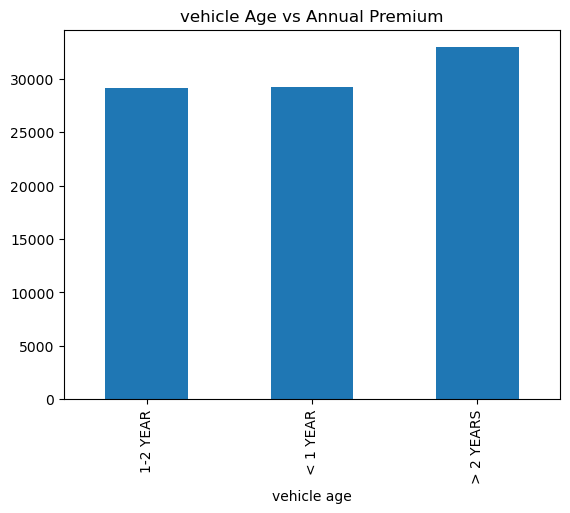

In [37]:
 # iv. Vehicle age wise average annual premium.
premium_vehicle_age = merged_customer_Data.groupby('vehicle age')['annual premium (in Rs)'].mean()
display(premium_vehicle_age)
premium_vehicle_age.plot.bar(title="vehicle Age vs Annual Premium")
plt.show()

In [38]:
# v. Is there any relation between Person Age and annual premium? 
# Hint: use correlation function (Correlation describes the relationship between two variables).
#        Correlation coefficient < -0.5 - Strong negative relationship
#        Correlation coefficient > 0.5 - Strong positive relationship
#        0.5 < Correlation coefficient < 0.5 - There is no relationship.

corr_age_premium = merged_customer_Data["age"].corr(merged_customer_Data['annual premium (in Rs)'])
print("Correlation Coefficent = ",corr_age_premium)
if corr_age_premium < -0.5:
    print("\nNote: Since the value of coefficeint < -0.5")
    print("Strongly Negative relationship between 'age' and 'annual premium")
elif corr_age_premium > 0.5:
    print("\nNote: Since the value of coefficeint > 0.5")
    print("Strongly Positive relationship between 'age' and 'annual premium")
else:
    print("\nNote: Since the value of coefficeint lies between -0.5 and 0.5")
    print("There is NO relationship between 'age' and 'annual premium'")

Correlation Coefficent =  0.05065758928617531

Note: Since the value of coefficeint lies between -0.5 and 0.5
There is NO relationship between 'age' and 'annual premium'
